In [10]:
!mamba install SciencePlots


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['scienceplots']

error    libmamba Could not open lockfile '/n/sw/Mambaforge-22.11.1-4/pkgs/cache/c

In [1]:
from postprocessing import *
import glob
import os
from natsort import natsorted

In [2]:
mpl.rcParams['figure.dpi']= 200

In [3]:
density = 10
mach = 8
jetpower = 38
start = '15'

In [4]:
simulation_directory = str(f'/n/holylfs05/LABS/hernquist_lab/Users/borodina/2kpc/turb_jet_d{density}_m{mach}/jet{jetpower}_{start}')
output_directory = simulation_directory + "/output/"
figures_directory = simulation_directory + "/output/figures/"

In [5]:
i_file = 20
filename = "snap_%03d.hdf5" % (i_file)
snap_data = h5py.File(output_directory + filename, "r")

In [7]:
x, y, z = snap_data['PartType0/Coordinates'][:].T
vx, vy, vz = snap_data['PartType0/Velocities'][:].T
jet_tracer = snap_data['PartType0/Jet_Tracer'][:].T
center = 0.5 * 2000
mask = (z > center - 300) & (z < center + 300) & (x > center - 300) & (x < center + 300) & (y > center - 300) & (y < center + 300) & \
       (jet_tracer > 1e-3)


In [23]:
coords_norm = snap_data['PartType0/Coordinates'][:][mask]/ 2000

In [26]:
from scipy.spatial import KDTree, ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# create a densely spaced grid in the plot region
x = np.linspace(0.9 * coords_norm.min(), 1.1 * coords_norm.max(), 100)
y = np.linspace(0.9 * coords_norm.min(), 1.1 * coords_norm.max(), 100)
z = np.linspace(0.9 * coords_norm.min(), 1.1 * coords_norm.max(), 100)
X,Y,Z = np.meshgrid(x,y,z)
gridpoints = np.column_stack((X.flatten(),Y.flatten(),Z.flatten()))
# do the nearest neighbor interpolation
kdt = KDTree(coords_norm)
nndist,nnidx = kdt.query(gridpoints)
# nnidx gives the index of the Voronoi nucelus for each point in the grid


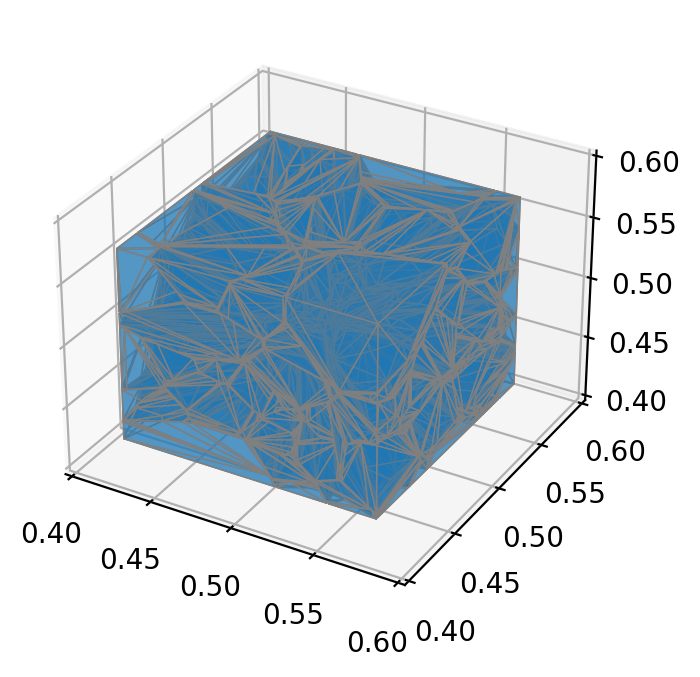

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# now cycle through all Voronoi indices
for voronoi_idx in np.unique(nnidx):
    idx_polygon = nnidx==voronoi_idx
    # create a convex hull around the point cloud
    hull = ConvexHull(gridpoints[idx_polygon])    
    polygon = Poly3DCollection(hull.points[hull.simplices], alpha=0.5, 
#                                facecolors=rng.uniform(0,1,3),
                               linewidths=0.5,edgecolors='gray')
    ax.add_collection3d(polygon)
# plt.xlim(0.9 * coords_norm.min(), 0.9 * coords_norm.max())
# plt.ylim(0.9 * coords_norm.min(), 0.9 * coords_norm.max())
# ax.set_zlim(0.9 * coords_norm.min(), 0.9 * coords_norm.max())

plt.xlim(0.4, 0.6)
plt.ylim(0.4, 0.6)
ax.set_zlim(0.4, 0.6)
plt.show()